### Capstone Idea

[GitHub](https://github.com/biborsz/Capstone)

**Problem Statement:** 

Beta.SAM.gov is the successor, among other federal governmental websites, of fedbizops.gov. The part that interests me is that it has a searchable collection of federal awards, as well as an information system of past grants. The current system is not yet fully operational. Nonetheless, it allows to search the collection based on key terms, grant id, (ide meg egyebek). One of it's problems in the past was that while it was searchable, it did not have a recommender system. Businesses, especially small businesses had to spend a considerable amount of time to find relevant grant opportunities. This new system offers that. Creating an account will have the advantage of receiving updates. However, the downside of email updates is that it clogs up the email inbox, and it does not always generate the expected value:
- it is difficult to know whether there are more opportunities out there or just the ones about which a business gets notified
- reader fatigue may cause businesses not to look further for contract opportunities than what had already been sent to them - and thus leave potential fundings on the table
- someone still needs to sift through a large amount of potentially irrelevant federal grant description

All in all: a user controlled recommender system would enhance the effectiveness of grant searching for businesses that do not have lots of resources to allocate toward that activity in the first place. 

How it would work:

- based on archival data - it would search for similarities in 
   - business activity of applicants
   - name of funding agency
   
   - earlier search terms
   - successful earlier grant applications

-> it would give a list of potentially useful search term, with an option to click on a select few

-> based on the search terms selected - it will further tune the recommender system

-> businesses have an option of rating a recommendation up or down

- based on earlier search terms - one would have access to a longer list of opportunites - that would make browsing possible (right now - it looks to me - that is out of the question)

- companies could search for other relevant information - for example: which companies are applying for similar grants in their business and geographic area
   
   
[API documentation](https://open.gsa.gov/api/get-opportunities-public-api/#user-account-api-key-creation)

[Beta.SAM.gov](https://beta.sam.gov/)

**Methodology:**
   - content based recommender system
   - text vectorizer: *bag-of-words*, *one-hot-encoder* 
     - bag of words: extracts words from the corpus as features
     - one-hot-encoder: gives a value of one if it finds a feature within a row/ text (0 to all other features)
   - classifies/ recommends based on *cosine similarities*

**Sources:**

https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

**Ideas for the future:**
 - find database of registered businesses (business activity/ line of business)
 - crossreference awardees in prior grants to provide a list of competitors

In [1]:
# imports
import pandas as pd
import numpy as np
import requests
import time
import datetime

In [128]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [ ]:
# rewrite code - to read in combined file - 
# separete out dates 
# split string '-'
# turn them into datetime object
# check for oldest date
# turn back into string
# make that postedTo date
# have for loop pull another page
# transform json object
# concat it to existing dataframe
# save it to csv
# I am at 03/02/2020

In [2]:
# define function to return minimum postedDate as string
def get_min_post_date(filename):
    # read in file of downloaded contract opportunities
    df = pd.read_csv(filename)
    # get min posted date
    min_date = pd.to_datetime(df['postedDate']).min()
    return min_date.strftime('%m/%d/%Y')

In [11]:
# get_min_post_date('./data/5_24_pull.csv')

'05/03/2020'

In [12]:
# pull contract information from api.sam.gov

# set base url
url = 'https://api.sam.gov/prod/opportunities/v1/search'

# create empty list to store results
result = []
# initialize counter
count = 0
# downloaded contract opportunities - file name
# file = './data/combined.csv'

# get minimum posted date from downloaded contract opportunities file
# set postedTo date to minimum posted date
# postedTo = get_min_post_date(file)
postedTo = get_min_post_date('./data/combined.csv')

# set posted from date
postedFrom = '01/01/2020'

# for loop to pull contracts
for i in range(10):
    count += 1
    
    # do a get request
    req = requests.get(url,
                      params={
                          'api_key': '',
                          'postedFrom': postedFrom,
                          'postedTo': postedTo,
                          'limit': 1000,
                          'offset': (count-1) * 1000
                      })
    
    # add response to result list
    result.append(req)
    
    now = datetime.datetime.now()
    print('Time:', now.strftime("%Y-%m-%d %H:%M:%S"))
    time.sleep(5)
    
    
    
# source for datetime - https://www.w3resource.com/python-exercises/python-basic-exercise-3.php

Time: 2020-05-25 20:55:55
Time: 2020-05-25 20:56:18
Time: 2020-05-25 20:56:25
Time: 2020-05-25 20:56:32
Time: 2020-05-25 20:56:39
Time: 2020-05-25 20:56:46
Time: 2020-05-25 20:56:53
Time: 2020-05-25 20:57:01
Time: 2020-05-25 20:57:07
Time: 2020-05-25 20:57:15


In [13]:
# unpack list of json objects from response data
ops = []
for item in result:
    print(item.headers)
    ops.append(item.json())

{'Age': '24', 'Content-Type': 'application/hal+json', 'Date': 'Tue, 26 May 2020 00:55:54 GMT', 'Server': 'openresty', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers', 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Cache': 'MISS', 'X-Forwarded-For': '74.96.156.35, 10.177.16.72, 10.177.55.40, 10.177.55.40', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Set-Cookie': 'citrix_ns_id=v6wQCxWWinb/M8EudR8UqiczdnM0002; Domain=.sam.gov; Path=/; Secure; HttpOnly', 'Cache-Control': 'private', 'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked'}
{'Age': '17', 'Content-Type': 'application/hal+json', 'Date': 'Tue, 26 May 2020 00:56:17 GMT', 'Server': 'openresty', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers', 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Cache': 'MISS', 'X-Forwarded-For': '74.96.156.35, 10.177.16.72, 10.177.55.40, 1

In [14]:
# parse json objects
ls_data = []
for i in range(len(ops)):
    print(ops[i].keys())
    df = pd.DataFrame(ops[i]['opportunitiesData'])
    ls_data.append(df)
    data = pd.concat(ls_data)

dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])
dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])


In [15]:
data.shape

(1958, 27)

In [16]:
data.tail(10)

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,...,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
948,02fc04952faa40e99b81403d1a301739,TECHNOLOGY TRANSFER OPPORTUNITY: Interference ...,T2P-LaRC-00052,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,NASA HEADQUARTERS,2020-04-30,Special Notice,Special Notice,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'LARC...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '20546', 'city': 'WASHINGTON', 'co...",None,None,https://beta.sam.gov/opp/02fc04952faa40e99b814...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
949,0266aca1a8d541b8bff595275792b2d8,81--Containers IST - Phila,SPE8ED20Q0649,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA TROOP SUPPORT,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '19111-5096', 'city': 'PHILADELPHI...",{},None,https://beta.sam.gov/opp/0266aca1a8d541b8bff59...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
950,01e9c96d3a6d442090e3f0e74ef929f9,59--SWITCH ASSEMBLY,SPE7M820T4057,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/01e9c96d3a6d442090e3f...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
951,01ac3d98691c4f5cbc21b16728cac057,"25--HINGE,DOOR,VEHICULA",SPE7L320T025P,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/01ac3d98691c4f5cbc21b...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
952,0193c02fd211451fa4e562611e79de2a,Q301--Cytogenetic and Esoteric Rapid Response ...,36C25220Q0464,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",252-NETWORK CONTRACT OFFICE 12 (36C252),2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'jo...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '53214', 'city': 'MILWAUKEE', 'cou...",{'streetAddress': 'Clement J. Zablocki VA Medi...,None,https://beta.sam.gov/opp/0193c02fd211451fa4e56...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
953,0178657760ad42df9fe37b3613aac373,Architect/Engineering Blanket Purchasing Agree...,AEBPA-4-30-2020,"ENERGY, DEPARTMENT OF","ENERGY, DEPARTMENT OF",ARGONNE NATL LAB - DOE CONTRACTOR,2020-04-30,Sources Sought,Sources Sought,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'cdro...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '60439', 'city': 'Lemont', 'countr...","{'city': {'code': '42795', 'name': 'Lemont'}, ...",None,https://beta.sam.gov/opp/0178657760ad42df9fe37...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
954,00d3e5746ec541669bb2310a623e43d7,"28--SPEED SENSOR,DIESEL",SPE7L520U0377,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3

In [46]:
# data.duplicated('noticeId').sum()

0

In [15]:
# data.drop_duplicates('noticeId', inplace=True)

In [13]:
# get keys from json object
# ops.keys()

dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])

In [22]:
# df1 = pd.DataFrame(ls_data[0])

In [23]:
# df1.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,...,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,ffde46534380498b8b003e9a4bf43029,"40--ROPE,FIBROUS",SPE8EE20Q0241,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA TROOP SUPPORT,2020-04-29,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '19111-5096', 'city': 'PHILADELPHI...",{},None,https://beta.sam.gov/opp/ffde46534380498b8b003...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
1,ffb9f28463e1499c983d4830d327a363,6515--iPack Rx Unit Dose Packager | Marion IL ...,36C25520Q0357,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",255-NETWORK CONTRACT OFFICE 15 (36C255),2020-04-29,Special Notice,Special Notice,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Au...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '66048', 'city': 'LEAVENWORTH', 'c...",{},None,https://beta.sam.gov/opp/ffb9f28463e1499c983d4...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
2,ff560b76deb94b20b558f88af464593b,CMc Services for the Philadelphia Custom House...,CMc_Services_US_Custom_House_Mechanical_and_Pl...,GENERAL SERVICES ADMINISTRATION,PUBLIC BUILDINGS SERVICE,PBS R3,2020-04-29,Sources Sought,Sources Sought,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'step...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '19106', 'city': 'PHILADELPHIA', '...","{'city': {'code': '60000', 'name': 'Philadelph...",None,https://beta.sam.gov/opp/ff560b76deb94b20b558f...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
3,ff3690fbb1964afe8f43af2da819062b,"61--CABLE AND CONDUIT A, IN REPAIR/MODIFICATIO...",N0010420QDC78,DEPT OF DEFENSE,DEPT OF THE NAVY,NAVSUP WEAPON SYSTEMS SUPPORT MECH,2020-04-29,Presolicitation,Presolicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'JU...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '17050-0788', 'city': 'MECHANICSBU...",{},None,https://beta.sam.gov/opp/ff3690fbb1964afe8f43a...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
4,fdd536d9a4c448bb8bd4cf765869eaf6,45--FEMALE URINARY DIVE,SPE8E820T3276,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA TROOP SUPPORT,2020-04-29,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '19111-5096', 'city': 'PHILADELPHI...",{},None,https://beta.sam.gov/opp/fdd536d9a4c448bb8bd4c...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None


In [17]:
data.to_csv('./data/5_25_pull.csv', index=False)

In [21]:
data.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,...,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
995,793e6a1479fa48a9bf958d7689626952,42--Confined Space Kits,HOOD48THCMBDESPW0004-01,DEPT OF DEFENSE,DEPT OF THE ARMY,W6QM MICC-FT DRUM,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'ma...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '13602-5220', 'city': 'FORT DRUM',...","{'streetAddress': 'Fort Hood, TX', 'zip': '765...",None,https://beta.sam.gov/opp/793e6a1479fa48a9bf958...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
996,793c78e2a0314d5c9b6f48f6fb594e18,"48--GEAR OPERATOR,VALVE",SPE7M320U0818,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/793c78e2a0314d5c9b6f4...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
997,7937789265144577a85373c647cc7bf4,"Preventative maintenance, corrective/remedial ...",FDA-SSN-1225491,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",FOOD AND DRUG ADMINISTRATION,FDA OFFICE OF ACQ GRANT SVCS,2020-04-27,Sources Sought,Sources Sought,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'roos...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '20857', 'city': 'ROCKVILLE', 'cou...","{'city': {'code': '72450', 'name': 'Silver Spr...",None,https://beta.sam.gov/opp/7937789265144577a8537...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
998,7922602ff23944009d0571e2e398e491,IDC for Foundation Pressure Relief Well Engine...,W91237-20-R-0002,DEPT OF DEFENSE,DEPT OF THE ARMY,US ARMY ENGINEER DISTRICT HUNTINGTO,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'kris...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '25701-5000', 'city': 'HUNTINGTON'...","{'city': {'code': '39460', 'name': 'Huntington...",None,https://beta.sam.gov/opp/7922602ff23944009d057...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
999,788f2935ea364f6d971595de09c4174a,Headquarters Lobby Renovation,HeadquartersLobbyRenovation,"TRANSPORTATION, DEPARTMENT OF",FEDERAL AVIATION ADMINISTRATION,6973GH FRANCHISE ACQUISITION SVCS,2020-04-27,Sources Sought,Sources Sought,auto15,...,None,"[{'fax': '', 'type': 'primary', 'email': 'step...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '73125', 'city': 'OKLAHOMA CITY', ...","{'city': {'code': '55000', 'name': 'Oklahoma C...",None,https://beta.sam.gov/opp/788f2935ea364f6d97159...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None


In [3]:
df1 = pd.read_csv('./data/combined.csv')
df2 = pd.read_csv('./data/5_24_pull.csv')

In [5]:
df2.shape

(10000, 27)

In [6]:
df = pd.concat([df1, df2])

In [7]:
df.shape

(44363, 27)

In [9]:
df.to_csv('./data/combined.csv', index=False)

## EDA

In [83]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,fffe1c1717fd4134918105ebe56573fa,"62--CONTROLLER,DIMMER",SPE4A620T685E,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Award Notice,Award Notice,auto15,2020-05-15,None,None,None,336320,62,Yes,"{'date': '2020-04-30', 'number': 'SPE4A620V997...","[{'fax': None, 'type': 'primary', 'email': 'RO...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'coun...",{},None,https://beta.sam.gov/opp/fffe1c1717fd413491810...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
1,fffc883019be4e46b48d0e8a04d98b9c,"25--LADDER,VEHICLE BOAR",SPE7L520U0365,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-15,332999,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/fffc883019be4e46b48d0...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
2,ffe1e325188c4e5884bef45d9bee277a,"Q402--Community Nursing Home for Louisiana, T...",36C25620Q0572,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",256-NETWORK CONTRACT OFFICE 16 (36C256),2020-04-30,Sources Sought,Sources Sought,autocustom,2020-08-10,None,None,2020-05-12,623110,Q402,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'ph...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '39157', 'city': 'RIDGELAND', 'cou...",{'streetAddress': '510 E. Stoner Ave;Shrevepor...,None,https://beta.sam.gov/opp/ffe1e325188c4e5884bef...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
3,ffd9e50512414ca3abf3a033f10f6a37,Radiant Scroll RFI,CFO4B7-20-04,DEPT OF DEFENSE,DEFENSE INTELLIGENCE AGENCY (DIA),VIRGINIA CONTRACTING ACTIVITY,2020-04-30,Sources Sought,Sources Sought,auto15,2020-06-18,None,None,2020-06-03T14:00:00-04:00,None,None,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'bian...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '203405100', 'city': 'WASHINGTON',...","{'country': {'code': 'USA', 'name': 'UNITED ST...",None,https://beta.sam.gov/opp/ffd9e50512414ca3abf3a...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
4,ffb8232fcafb4be392684619b2fa1a96,SPRDL1-20-R-0013 Circuit Card Assembly,SPRDL1-20-R-0013,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND WARREN,2020-04-30,Solicitation,Solicitation,auto15,2020-06-13,None,None,2020-05-29T23:30:00-04:00,335931,5998,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'kris...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '48397-5000', 'city': 'WARREN', 'c...",None,None,https://beta.sam.gov/opp/ffb8232fcafb4be392684...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...


In [84]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
495,b11e32185b034698a75c33b38c153eda,"47--CLAMP,HOSE",SPE7M320T9231,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-10,Service-Disabled Veteran-Owned Small Business ...,SDVOSBC,2020-05-11,332996,47,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b11e32185b034698a75c3...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
496,b11470a7ca4e4d04be3f9f350959f000,TEMP ELEC RENTAL PACKAGE,N3904020Q0156,DEPT OF DEFENSE,DEPT OF THE NAVY,PORTSMOUTH NAVAL SHIPYARD GF,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-21,None,None,2020-05-06T18:00:00-04:00,532490,W059,Yes,None,"[{'fax': '2074384913', 'type': 'primary', 'ema...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '03801-5000', 'city': 'PORTSMOUTH'...","{'city': {'code': '34180', 'name': 'Groton'}, ...",None,https://beta.sam.gov/opp/b11470a7ca4e4d04be3f9...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
497,b09fb1db8eb04922929ac66df49f07fc,"25--GRILLE,METAL",SPE7L320U1292,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,None,None,2020-05-15,333912,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b09fb1db8eb04922929ac...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
498,b097c861f25c4803bddf7428763f6da2,"Battery Chargers for Devils Lake, ND, and Greg...",89503420QWA000308,"ENERGY, DEPARTMENT OF","ENERGY, DEPARTMENT OF",WESTERN-UPPPER GREAT PLAINS REGION,2020-04-30,Solicitation,Presolicitation,auto15,2020-05-23,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-08T12:00:00-05:00,335999,6150,Yes,None,"[{'fax': '6053532645', 'type': 'primary', 'ema...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '59101', 'city': 'BILLINGS', 'coun...","{'city': {'code': '19420', 'name': 'Devils Lak...",None,https://beta.sam.gov/opp/b097c861f25c4803bddf7...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
499,b06f096ac0cf48239edb581703a9af6a,"25--BRACKET,VEHICULAR C",SPE7L320U1311,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,None,None,2020-05-15,332510,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b06f096ac0cf48239edb5...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None


In [85]:
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   noticeId                   500 non-null    object
 1   title                      500 non-null    object
 2   solicitationNumber         499 non-null    object
 3   department                 500 non-null    object
 4   subTier                    500 non-null    object
 5   office                     500 non-null    object
 6   postedDate                 500 non-null    object
 7   type                       500 non-null    object
 8   baseType                   500 non-null    object
 9   archiveType                500 non-null    object
 10  archiveDate                500 non-null    object
 11  typeOfSetAsideDescription  174 non-null    object
 12  typeOfSetAside             175 non-null    object
 13  responseDeadLine           362 non-null    object
 14  naicsCode 

In [87]:
import matplotlib.pyplot as plt

In [100]:
# columns with missing values

cols_w_missings = df.loc[:, df.isna().sum() > 0]

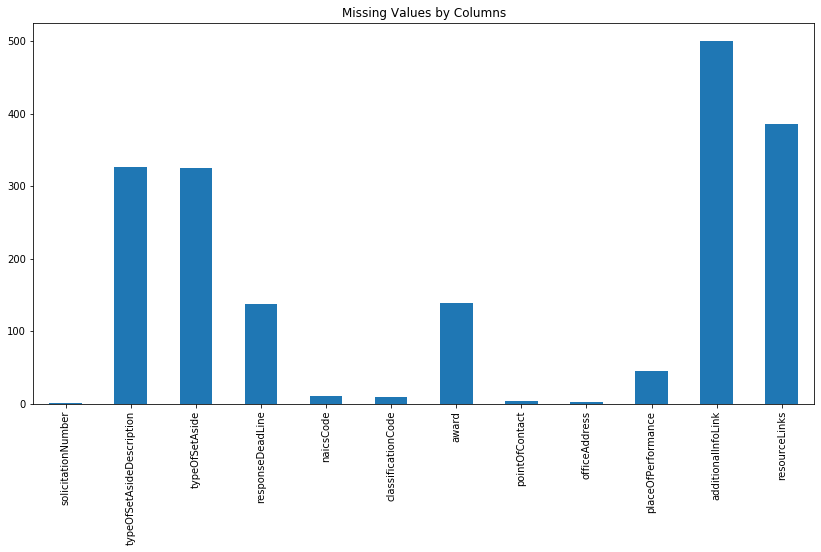

In [105]:

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [115]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 500

Number of missing values:
    solicitationNumber column    = 1
    typeOfSetAsideDescription column    = 326
    typeOfSetAside column    = 325
    responseDeadLine column    = 138
    naicsCode column    = 10
    classificationCode column    = 9
    award column    = 139
    pointOfContact column    = 4
    officeAddress column    = 2
    placeOfPerformance column    = 45
    additionalInfoLink column    = 500
    resourceLinks column    = 386


In [119]:
# drop additionalInfoLink column

df.drop('additionalInfoLink', axis=1, inplace=True)

In [123]:
# inspect title column

df['title'].head(15)

0                                                                   62--CONTROLLER,DIMMER
1                                                                 25--LADDER,VEHICLE BOAR
2     Q402--Community Nursing Home  for Louisiana, Texas, and Arkansas Catchment Areas   
3                                                                      Radiant Scroll RFI
4                                                  SPRDL1-20-R-0013 Circuit Card Assembly
5                                                                         16--MASK,OXYGEN
6                                                                 15--TRAILING EDGE ASSY,
7                                                    Stryker Medium Caliber Weapon System
8                                                                   43--COMPRESSOR,ROTARY
9                                                                 59--RELAY,ELECTROMAGNET
10                                                                15--HOUSING ASSEMBLY,CO
11        

In [133]:
from nltk.tokenize import RegexpTokenizer

In [145]:
# define function to tokenize a column

def tokenizer_function(column):
    """
    Takes in a text column
        tokenizes the text in each row
        using pattern [[a-zA-Z]\w+]
        which matches every lowercase and upperase character between a-z that are word characters
    Returns list of strings
    """
    
    # instantiate empty list of tokenized text
    texts = []
    
    # instantiate tokenizer
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    # create for loop to tokenize each row and add the list of tokens to texts
    for text in column:
        tokens = tokenizer.tokenize(text)
        
        # transform tokens into lower case strings
        tokens = [token.lower() for token in tokens]
        texts.append(tokens)
    return pd.Series(texts)

In [146]:
# call tokenizer function on df['title']

tokenizer_function(df['title'])

0                                                                          [controller, dimmer]
1                                                                       [ladder, vehicle, boar]
2      [q402, community, nursing, home, for, louisiana, texas, and, arkansas, catchment, areas]
3                                                                        [radiant, scroll, rfi]
4                                                             [sprdl1, circuit, card, assembly]
                                                 ...                                           
495                                                                               [clamp, hose]
496                                                               [temp, elec, rental, package]
497                                                                             [grille, metal]
498                                [battery, chargers, for, devils, lake, nd, and, gregory, sd]
499                                     

In [150]:
df.sample(5)

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,uiLink,links,resourceLinks
292,d1cb1e5e240a42669208c6185a483d58,"PROVIDE, INSTALL, AND MAINTAIN A 10MB ETHERNET LEASE ON THE IQO BULLETIN BOARD BETWEEN (BLDG) 3, (RM) COMM, 6155 EL CAMINO REAL, CARLSBAD, CA 92009/CCI AND (BLDG) 7210, (RM) TELCO, 7210 MITSCHER WAY, MCAS, SAN DIEGO, CA 92145/CCI.",HC101319QA046,DEPT OF DEFENSE,DEFENSE INFORMATION SYSTEMS AGENCY (DISA),DITCO-SCOTT,2020-04-30,Solicitation,Solicitation,autocustom,2021-04-30,None,None,2020-06-01T16:00:00-05:00,517311,D304,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'aaron.j.fuehne.civ@mail.mil', 'phone': '', 'title': None, 'fullName': 'Aaron Fuehne'}, {'fax': '', 'type': 'secondary', 'email': 'dale.l.rupright.civ@mail.mil', 'phone': '6184186614', 'title': None, 'fullName': 'Dale L. Rupright'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=d1cb1e5e240a42669208c6185a483d58,OFFICE,"{'zipcode': '622255406', 'city': 'SCOTT AFB', 'countryCode': 'USA', 'state': 'IL'}",None,https://beta.sam.gov/opp/d1cb1e5e240a42669208c6185a483d58/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=d1cb1e5e240a42669208c6185a483d58&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",[https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/167ad0da6808468bbae61c219fe83e77/download?api_key=null&token=]
67,f6c2522a454a43cf83d7f70e4947e25c,NPIN Domain 1: Information and Communication Technology Bridge Contract,75D301-20-R-67968,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,2020-04-30,Presolicitation,Presolicitation,autocustom,2020-12-31,None,None,2020-05-15T14:00:00-04:00,519190,D322,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'vyh1@cdc.gov', 'phone': '7704882856', 'title': None, 'fullName': 'Liubov Kriel'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=f6c2522a454a43cf83d7f70e4947e25c,OFFICE,"{'zipcode': '30333', 'city': 'ATLANTA', 'countryCode': 'USA', 'state': 'GA'}","{'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/f6c2522a454a43cf83d7f70e4947e25c/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=f6c2522a454a43cf83d7f70e4947e25c&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",None
95,f278da7d0c404afa82df7729ada8faa5,"66--LIGHT,INSTRUMENT",SPE4A620T6068,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Award Notice,Award Notice,auto15,2020-05-15,None,None,None,334519,66,Yes,"{'date': '2020-04-30', 'number': 'SPE4A620PG488', 'amount': '73500.00', 'awardee': {'name': 'GENERAL RELIANCE CORPORATION 88 FORD RD STE 20 DENVILLE 07834-1378 US', 'location': {}, 'duns': '002196400', 'cageCode': '14339'}}","[{'fax': None, 'type': 'primary', 'email': 'THERESA.RICHARDSON@DLA.MIL', 'phone': None, 'title': None, 'fullName': 'THERESA RICHARDSON804-279-2612'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=f278da7d0c404afa82df7729ada8faa5,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'countryCode': 'USA', 'state': 'VA'}",{},https://beta.sam.gov/opp/f278da7d0c404afa82df7729ada8faa5/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=f278da7d0c404afa82df7729ada8faa5&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",None
85,f3c18aec0d0440e3a7d1177292034bcd,"DETECTOR, METALLIC P",SPE4A720R0656,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Presolicitation,Sources Sought,auto15,2020-06-30,None,None,2020-06-15T14:00:00-04:00,336412,2995,Yes,None,"[{'fax': '', 't

In [179]:
# find count unique values of df['type']
df['type'].value_counts(normalize=True)

Combined Synopsis/Solicitation    0.458
Award Notice                      0.228
Solicitation                      0.110
Presolicitation                   0.066
Sources Sought                    0.062
Special Notice                    0.054
Justification                     0.022
Name: type, dtype: float64

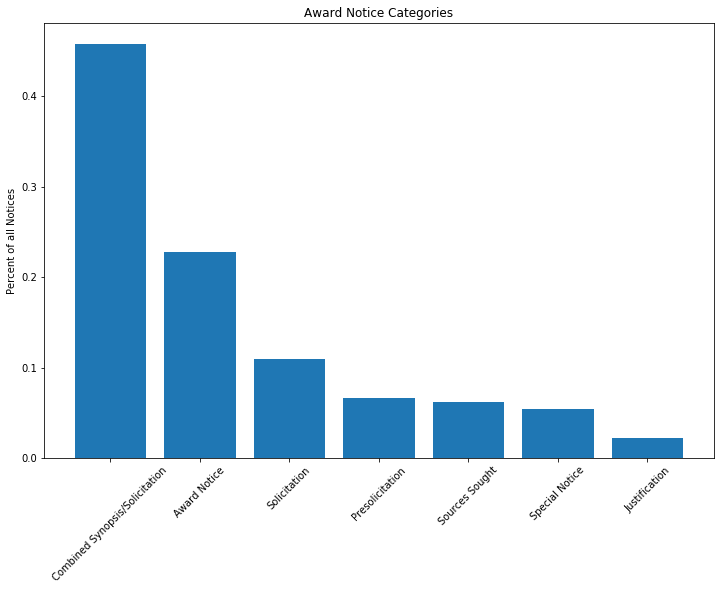

In [184]:
# find count unique values of df['type']

fig = plt.figure(figsize=(12, 8))
plt.title('Award Notice Categories')
plt.xticks(rotation=45)
plt.ylabel('Percent of all Notices')
plt.bar(df['type'].value_counts().index, df['type'].value_counts(normalize=True));

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python

In [195]:
# combine solicitation notices with combined synopsis and soliciation notices

print(f"Percent of all soliciation notices: \
{round(df['type'].value_counts(normalize=True)['Combined Synopsis/Solicitation'] + df['type'].value_counts(normalize=True)['Solicitation'], 4)}\
")

Percent of all soliciation notices: 0.568


*Observation:* close to 50% of all Notices is a combined synopsis and solicitation, followed by the 22% of award notices. When we combine all types of solicitations, 56.8% of all notices is soliciting for a submission. 

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,uiLink,links,resourceLinks
0,fffe1c1717fd4134918105ebe56573fa,"62--CONTROLLER,DIMMER",SPE4A620T685E,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Award Notice,Award Notice,auto15,2020-05-15,None,None,None,336320,62,Yes,"{'date': '2020-04-30', 'number': 'SPE4A620V9972', 'amount': '40225.00', 'awardee': {'name': 'DNE TECHNOLOGIES, INC. 50 BARNES PARK RD N STE 101 WALLINGFORD 06492-5920 US', 'location': {}, 'duns': '001162320', 'cageCode': '96238'}}","[{'fax': None, 'type': 'primary', 'email': 'ROBERT.OKRASINSKI@DLA.MIL', 'phone': None, 'title': None, 'fullName': 'ROBERT OKRASINSKI804-279-5739'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=fffe1c1717fd4134918105ebe56573fa,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'countryCode': 'USA', 'state': 'VA'}",{},https://beta.sam.gov/opp/fffe1c1717fd4134918105ebe56573fa/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=fffe1c1717fd4134918105ebe56573fa&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",None
1,fffc883019be4e46b48d0e8a04d98b9c,"25--LADDER,VEHICLE BOAR",SPE7L520U0365,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-15,332999,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'DibbsBSM@dla.mil', 'phone': None, 'title': None, 'fullName': 'Questions regarding this solicitation should be emailed to the buyer listed in block 5 of the solicitation document which can be found under the Additional Information link. If the Additional Information link does not work, please go to https://www.dibbs.'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=fffc883019be4e46b48d0e8a04d98b9c,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', 'countryCode': 'USA', 'state': 'OH'}",{},https://beta.sam.gov/opp/fffc883019be4e46b48d0e8a04d98b9c/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=fffc883019be4e46b48d0e8a04d98b9c&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",None
2,ffe1e325188c4e5884bef45d9bee277a,"Q402--Community Nursing Home for Louisiana, Texas, and Arkansas Catchment Areas",36C25620Q0572,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",256-NETWORK CONTRACT OFFICE 16 (36C256),2020-04-30,Sources Sought,Sources Sought,autocustom,2020-08-10,None,None,2020-05-12,623110,Q402,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'phyllis.shealey@va.gov', 'phone': None, 'title': None, 'fullName': 'Phyllis Shealey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe1e325188c4e5884bef45d9bee277a,OFFICE,"{'zipcode': '39157', 'city': 'RIDGELAND', 'countryCode': 'USA', 'state': 'MS'}","{'streetAddress': '510 E. Stoner Ave;Shreveport, LA', 'zip': '71101', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/ffe1e325188c4e5884bef45d9bee277a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe1e325188c4e5884bef45d9bee277a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",None
3,ffd9e50512414ca3abf3a033f10f6a37,Radiant Scroll RFI,CFO4B7-20-04,DEPT OF DEFENSE,DEFENSE INTELLIGENCE AGENCY (DIA),VIRGINIA CONTRACTING ACTIVITY,2020-04-30,Sources Sought,Sources Sought,auto15,2020-06-18,None,None,2020-06-03T14:00:00-04:00,None,None,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'bianca.rogan2@dodiis.mil', 'phone': '', 'title'

In [3]:
# check 5_15 pull

df = pd.read_csv('./data/5_15_pull.csv')

In [5]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,...,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
995,113403932e4a49c68e4160cec134fb1c,DAVIS DAM-DOWNSTREAM LRAD,140R3020Q0051,"INTERIOR, DEPARTMENT OF THE",BUREAU OF RECLAMATION,LOWER COLORADO REGIONAL OFFICE,2020-04-29,Solicitation,Solicitation,auto15,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'lr...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '89005', 'city': 'BOULDER CITY', '...",{},NaN,https://beta.sam.gov/opp/113403932e4a49c68e416...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
996,10be2eebb736483090aaae900ad4bbc3,G083384/TAF Linhas Aere/Brazil,83310120Q0029,EXPORT-IMPORT BANK OF THE US,EXPORT-IMPORT BANK OF THE US,EXPORT IMPORT BANK OF US,2020-04-29,Special Notice,Special Notice,auto15,...,NaN,"[{'fax': '2025653527', 'type': 'primary', 'ema...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '20571', 'city': 'WASHINGTON', 'co...","{'city': {'code': '50000', 'name': 'Washington...",NaN,https://beta.sam.gov/opp/10be2eebb736483090aaa...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",['https://beta.sam.gov/api/prod/opps/v3/opport...
997,10afd97b4b654ca5b3f65bfa81f9e39f,Reagents for diagnostic - GEIS surveillance pr...,N44852_VEID200297,DEPT OF DEFENSE,DEPT OF THE NAVY,NAVAL MEDICAL RESEARCH CENTER DET,2020-04-29,Presolicitation,Presolicitation,auto15,...,NaN,"[{'fax': '', 'type': 'primary', 'email': 'gena...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '34031-0008', 'city': 'DPO', 'coun...","{'country': {'code': 'PER', 'name': 'PERU'}}",NaN,https://beta.sam.gov/opp/10afd97b4b654ca5b3f65...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
998,107e1f7dfc334c44b23ec1a8da2eeec8,SOPGM Containers,FA865620R0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA8656 AFLCMC OL PK RAC,2020-04-29,Solicitation,Solicitation,auto15,...,NaN,"[{'fax': '', 'type': 'primary', 'email': 'step...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '32542-6883', 'city': 'EGLIN AFB',...",NaN,NaN,https://beta.sam.gov/opp/107e1f7dfc334c44b23ec...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",['https://beta.sam.gov/api/prod/opps/v3/opport...
999,1075f9a9db754e718ee4e8f7c0ffa76b,"43--COMPRESSOR,RECIPROC",SPRMM120QYD63,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),SPRMM1 DLA MECHANICSBURG,2020-04-29,Solicitation,Solicitation,auto15,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'DA...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '17055-0788', 'city': 'MECHANICSBU...",{},NaN,https://beta.sam.gov/opp/1075f9a9db754e718ee4e...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",['https://beta.sam.gov/api/prod/opps/v3/opport...
